In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn.feature_selection import SelectFromModel

In [9]:
data=pd.read_csv('CAD.csv')

In [10]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [11]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [15]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
data[data['target']==1].describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0
mean,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212,1.0
std,9.550651,0.497444,0.952222,16.169613,53.552872,0.347412,0.504818,19.174276,0.347412,0.780683,0.593635,0.848894,0.465752,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,59.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0


/var/folders/9y/610tzfp14gv7y3_n3zqsfvv80000gn/T/ipykernel_57258/3262849815.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


<Axes: xlabel='age', ylabel='Density'>

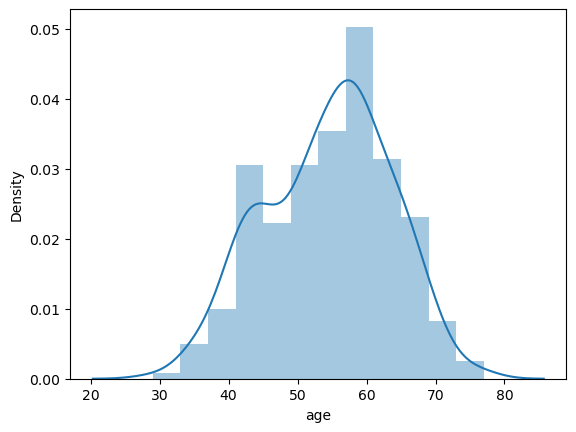

In [18]:
sns.distplot(data['age'])

/var/folders/9y/610tzfp14gv7y3_n3zqsfvv80000gn/T/ipykernel_57258/2894423654.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'].where(data['target']==1))


<Axes: xlabel='age', ylabel='Density'>

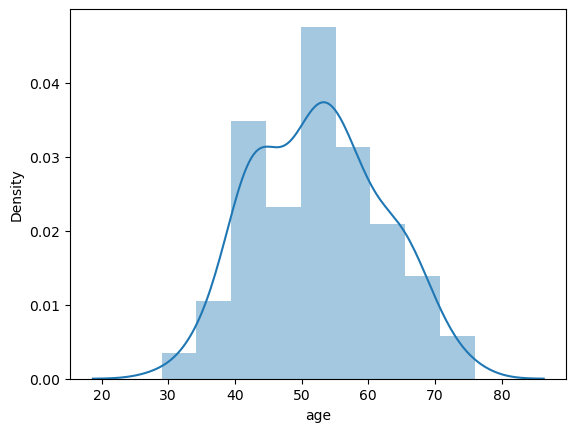

In [17]:
sns.distplot(data['age'].where(data['target']==1))

In [10]:
pd.DataFrame(data['target'].value_counts())

,count
target,
1,165
0,138


In [19]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<Axes: xlabel='thal'>

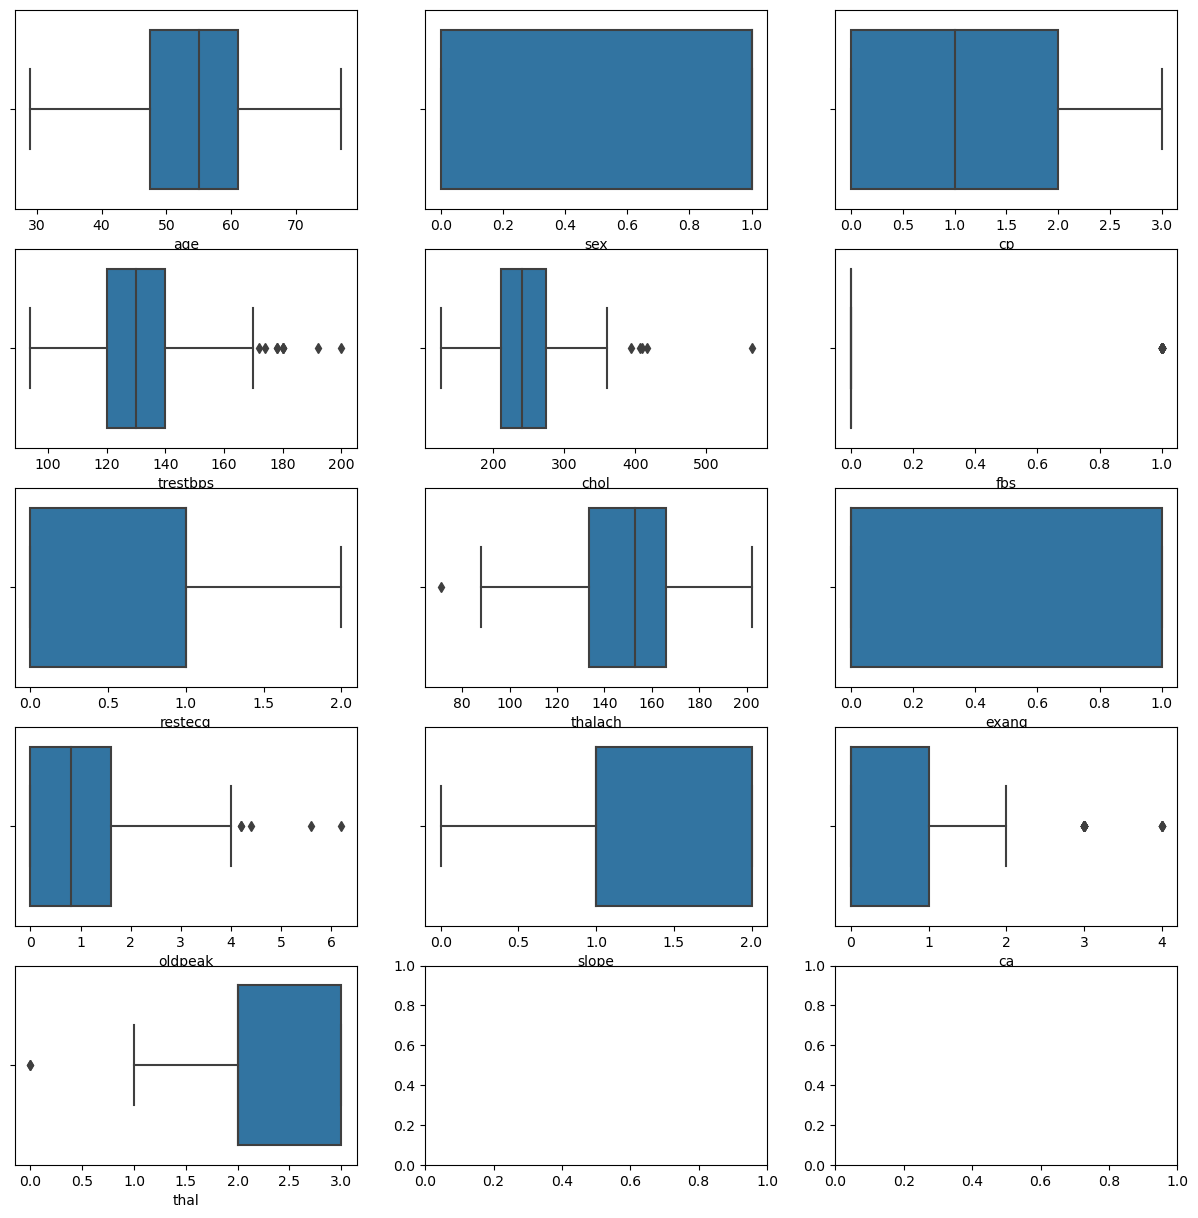

In [22]:
fig, ax = plt.subplots(5, 3, figsize = (15, 15))
sns.boxplot(x= data["age"], ax = ax[0,0])
sns.boxplot(x= data["sex"], ax = ax[0,1])
sns.boxplot(x= data["cp"], ax = ax[0,2])
sns.boxplot(x= data["trestbps"], ax = ax[1,0])
sns.boxplot(x= data["chol"], ax = ax[1,1])
sns.boxplot(x= data["fbs"], ax = ax[1,2])
sns.boxplot(x= data["restecg"], ax = ax[2,0])
sns.boxplot(x= data["thalach"], ax = ax[2,1])
sns.boxplot(x= data["exang"], ax = ax[2,2])
sns.boxplot(x= data["oldpeak"], ax = ax[3,0])
sns.boxplot(x= data["slope"], ax = ax[3,1])
sns.boxplot(x= data["ca"], ax = ax[3,2])
sns.boxplot(x= data["thal"], ax = ax[4,0])

In [23]:
#using IQR method for finding outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [24]:
#for checking which columns has outlies
((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=0)

age         False
sex         False
cp          False
trestbps     True
chol         True
fbs          True
restecg     False
thalach      True
exang       False
oldpeak      True
slope       False
ca           True
thal         True
target      False
dtype: bool

In [25]:
data['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

<Axes: >

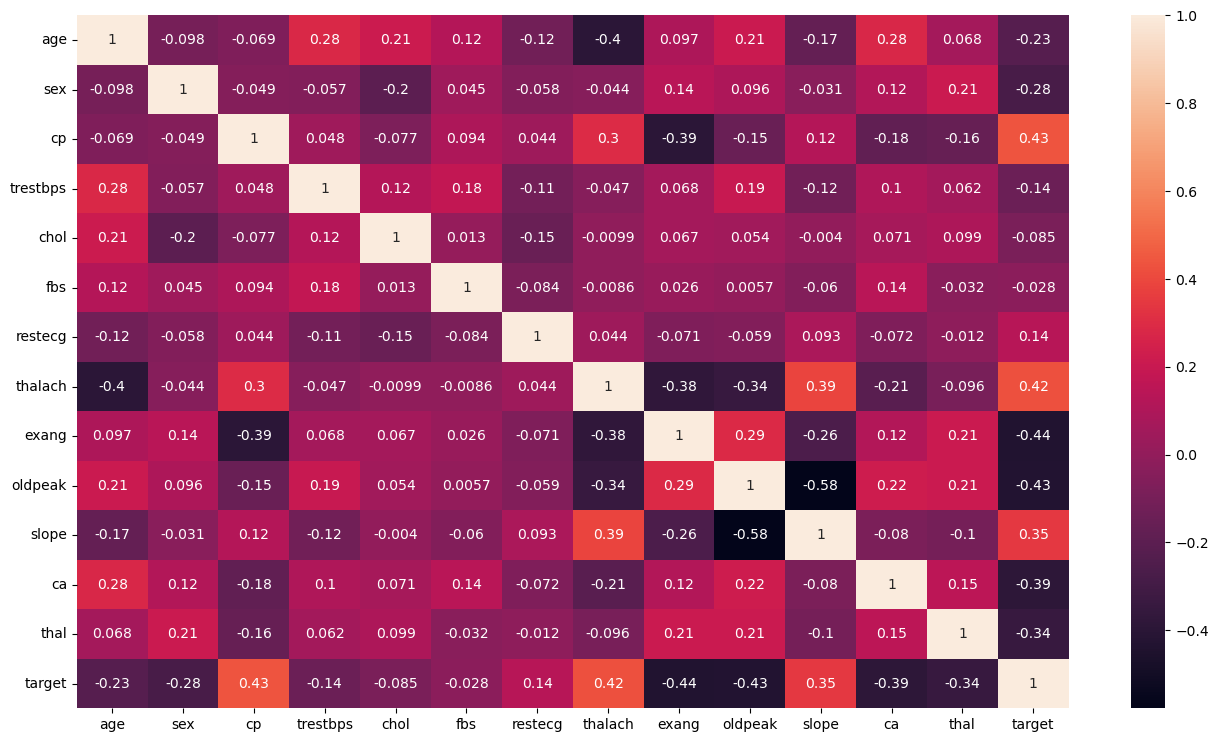

In [26]:
#ploting Heat Map to check the correlation of the each attribute
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(),annot=True)


In [27]:
#using IQR method for finding outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
df_new_tf = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df_new_tf.drop(labels=['target'], axis=1),df_new_tf['target'],
    test_size=0.2,
    random_state=10)

In [29]:
scaler = StandardScaler()
scaler.fit(X_train.fillna(0))

StandardScaler()

In [30]:
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear'))
sel_.fit(scaler.transform(X_train.fillna(0)), y_train)

SelectFromModel(estimator=LogisticRegression(C=1, penalty='l1',
                                             solver='liblinear'))

In [31]:
sel_.get_support()

array([False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True])

In [32]:
X_train_selected = sel_.transform(X_train.fillna(0))
X_test_selected = sel_.transform(X_test.fillna(0))
X_train_selected.shape, X_test_selected.shape

/Users/aryansmac/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/aryansmac/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


((182, 11), (46, 11))

In [33]:
X_train_selected

array([[  1.,   0., 112., ...,   2.,   0.,   2.],
       [  0.,   1., 130., ...,   2.,   0.,   2.],
       [  1.,   1., 120., ...,   2.,   0.,   2.],
       ...,
       [  1.,   0., 150., ...,   2.,   0.,   2.],
       [  0.,   0., 130., ...,   1.,   0.,   2.],
       [  0.,   2., 130., ...,   2.,   0.,   2.]])

In [34]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
x_train_norm = norm.fit_transform(X_train_selected)
x_test_norm = norm.fit_transform(X_test_selected)

In [35]:
x_train_norm

array([[1.        , 0.        , 0.23684211, ..., 1.        , 0.        ,
        0.5       ],
       [0.        , 0.33333333, 0.47368421, ..., 1.        , 0.        ,
        0.5       ],
       [1.        , 0.33333333, 0.34210526, ..., 1.        , 0.        ,
        0.5       ],
       ...,
       [1.        , 0.        , 0.73684211, ..., 1.        , 0.        ,
        0.5       ],
       [0.        , 0.        , 0.47368421, ..., 0.5       , 0.        ,
        0.5       ],
       [0.        , 0.66666667, 0.47368421, ..., 1.        , 0.        ,
        0.5       ]])

In [63]:
# Defining the model
model_self = keras.Sequential([
    keras.layers.BatchNormalization(),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(12, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(6, activation='relu'),
    
    
    keras.layers.Dense(1, activation = 'sigmoid')
])


In [64]:
model_self.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])

In [70]:
%%timeit -n1 -r1
with tf.device("/CPU:0"):
    model_self.fit(x_train_norm, y_train, epochs=50, validation_data=(x_test_norm, y_test))

Epoch 1/50
6/6 [==============================] - 0s 8ms/step - loss: 0.3266 - accuracy: 0.8407 - val_loss: 0.2242 - val_accuracy: 0.9348
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 0.2964 - accuracy: 0.8901 - val_loss: 0.2281 - val_accuracy: 0.9348
Epoch 3/50
6/6 [==============================] - 0s 5ms/step - loss: 0.3004 - accuracy: 0.8736 - val_loss: 0.2284 - val_accuracy: 0.9348
Epoch 4/50
6/6 [==============================] - 0s 4ms/step - loss: 0.3077 - accuracy: 0.8736 - val_loss: 0.2297 - val_accuracy: 0.9348
Epoch 5/50
6/6 [==============================] - 0s 5ms/step - loss: 0.3515 - accuracy: 0.8681 - val_loss: 0.2283 - val_accuracy: 0.9348
Epoch 6/50
6/6 [==============================] - 0s 4ms/step - loss: 0.3140 - accuracy: 0.8736 - val_loss: 0.2232 - val_accuracy: 0.9348
Epoch 7/50
6/6 [==============================] - 0s 6ms/step - loss: 0.2773 - accuracy: 0.8846 - val_loss: 0.2223 - val_accuracy: 0.9565
Epoch 8/50
6/6 [==================

In [71]:
loss, accuracy = model_self.evaluate(x_test_norm, y_test)

2/2 [==============================] - 0s 23ms/step - loss: 0.2246 - accuracy: 0.9348


In [164]:
# Defining the model
model_self_new = keras.Sequential([
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation = 'sigmoid'),
    keras.layers.Dropout(0.1),
    
    keras.layers.Dense(1, activation = 'sigmoid')
])
model_self_new.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])

In [165]:
%%timeit -n1 -r1
with tf.device("/CPU:0"):
    model_self_new.fit(x_train_norm, y_train, epochs=50, validation_data=(x_test_norm, y_test))

Epoch 1/50
6/6 [==============================] - 0s 12ms/step - loss: 0.7428 - accuracy: 0.4451 - val_loss: 0.7278 - val_accuracy: 0.3913
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 0.6612 - accuracy: 0.5495 - val_loss: 0.6945 - val_accuracy: 0.3696
Epoch 3/50
6/6 [==============================] - 0s 5ms/step - loss: 0.6352 - accuracy: 0.6538 - val_loss: 0.6656 - val_accuracy: 0.5435
Epoch 4/50
6/6 [==============================] - 0s 6ms/step - loss: 0.5876 - accuracy: 0.7363 - val_loss: 0.6400 - val_accuracy: 0.8043
Epoch 5/50
6/6 [==============================] - 0s 4ms/step - loss: 0.5547 - accuracy: 0.7802 - val_loss: 0.6175 - val_accuracy: 0.8913
Epoch 6/50
6/6 [==============================] - 0s 5ms/step - loss: 0.5451 - accuracy: 0.7912 - val_loss: 0.5960 - val_accuracy: 0.9130
Epoch 7/50
6/6 [==============================] - 0s 4ms/step - loss: 0.5229 - accuracy: 0.7637 - val_loss: 0.5764 - val_accuracy: 0.9130
Epoch 8/50
6/6 [=================

In [167]:
loss, accuracy = model_self_new.evaluate(x_test_norm, y_test)

2/2 [==============================] - 0s 103ms/step - loss: 0.3077 - accuracy: 0.8913


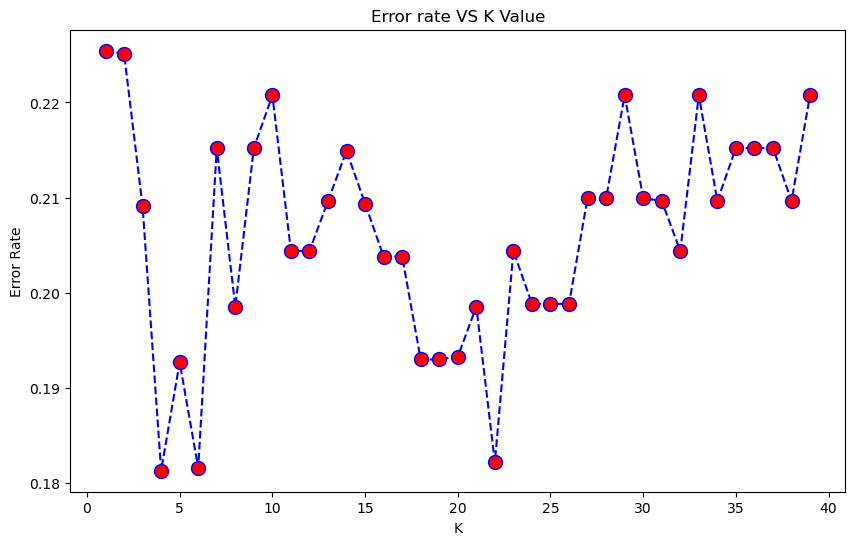

In [72]:
#Elbow Method
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, x_train_norm, y_train, cv=10)
    error_rate.append(1-score.mean())
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

plt.title('Error rate VS K Value')
plt.xlabel('K')
plt.ylabel('Error Rate') 
plt.savefig('Error_rate_vs_kvalue.png')

In [73]:
clf1 = LogisticRegression(max_iter = 1000, penalty='l2',C=1)
clf2 = SVC(C=1, kernel='rbf', gamma=1)
clf3 = tree.DecisionTreeClassifier(criterion='gini')
clf4 = KNeighborsClassifier(n_neighbors=10)
clf5 = GaussianNB()
clf6 = RandomForestClassifier(criterion='entropy', n_estimators=4)
clf7 = AdaBoostClassifier(n_estimators=600,learning_rate=0.001, random_state=1)

In [74]:
models = [clf1,clf2,clf3,clf4,clf5,clf6,clf7]
accuracy ={}
for i in models:
    
    i.fit(x_train_norm,y_train)
    accuracy[i] = i.score(x_test_norm, y_test)

In [75]:
accuracy

{LogisticRegression(C=1, max_iter=1000): 0.9130434782608695,
 SVC(C=1, gamma=1): 0.9130434782608695,
 DecisionTreeClassifier(): 0.7608695652173914,
 KNeighborsClassifier(n_neighbors=10): 0.9130434782608695,
 GaussianNB(): 0.8913043478260869,
 RandomForestClassifier(criterion='entropy', n_estimators=4): 0.7608695652173914,
 AdaBoostClassifier(learning_rate=0.001, n_estimators=600, random_state=1): 0.8913043478260869}

In [190]:
y_pred_lr=clf1.predict(x_test_norm)
y_pred_svc=clf2.predict(x_test_norm)
y_pred_rf=clf6.predict(x_test_norm)
y_pred_adaboost=clf7.predict(x_test_norm)

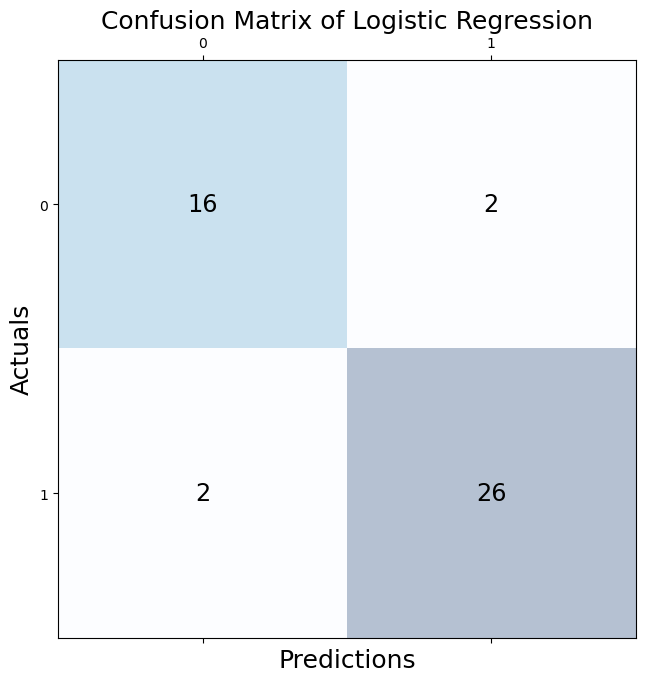

In [193]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_lr)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of Logistic Regression', fontsize=18)
plt.savefig('cm_lr.png')
plt.show()


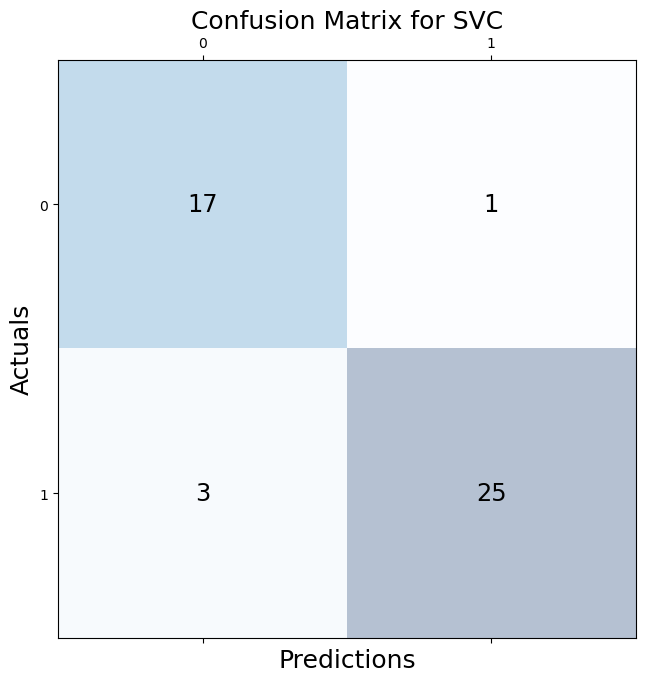

In [194]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_svc)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix for SVC', fontsize=18)
plt.savefig('cm_svc.png')
plt.show()


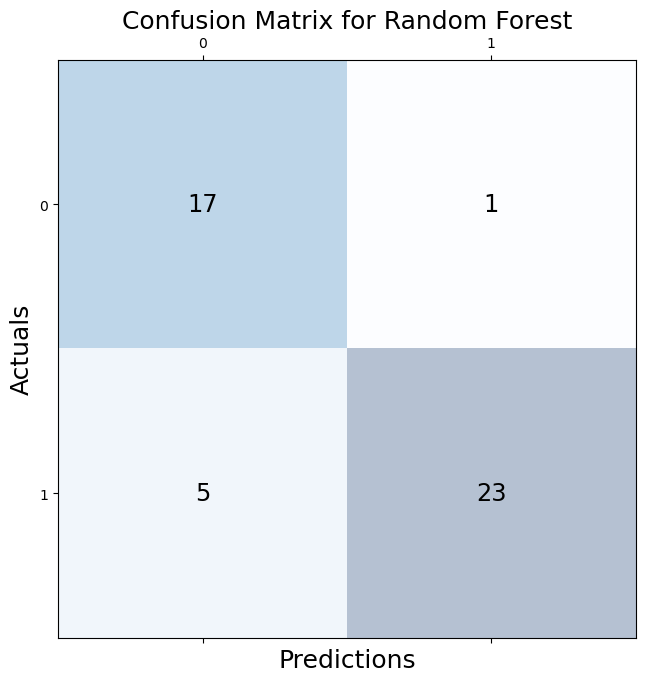

In [195]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_rf)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix for Random Forest', fontsize=18)
plt.savefig('cm_rf.png')
plt.show()


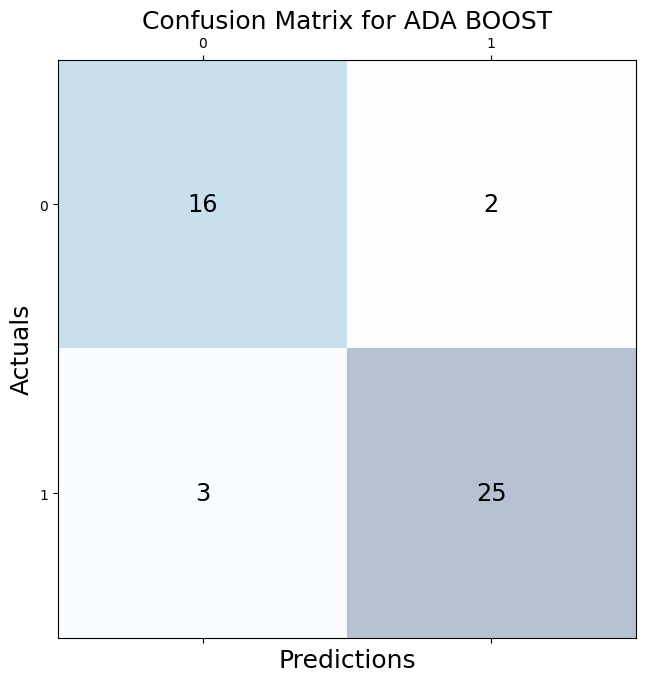

In [196]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_adaboost)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix for ADA BOOST', fontsize=18)
plt.savefig('cm_ada_boost.png')
plt.show()
